In [64]:
import numpy as np
from qsim_cells.generative import create_rotation_circuit

# Create the circuit using the function
ang_ct1 = [np.pi*0.2, np.pi*0.1, np.pi*0.4, np.pi*0.9, np.pi*0.8]
#ang_ct1 = [np.pi*0.2, np.pi*0.0, np.pi*0.0, np.pi*0.9, np.pi*0.0]
circuit_ct1 = create_rotation_circuit(ang_ct1)

# Create the circuit using the function
ang_ct2 = [np.pi*0.2, np.pi*0.3, np.pi*0.2, np.pi*0.7, np.pi*0.5]
#ang_ct2 = [np.pi*0.2, np.pi*0.0, np.pi*0.2, np.pi*0.0, np.pi*0.0]
circuit_ct2 = create_rotation_circuit(ang_ct2)

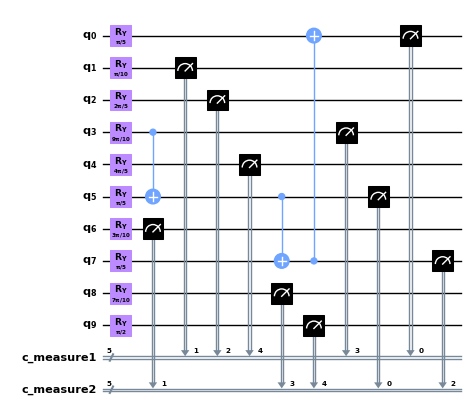

In [65]:
from qsim_cells.generative import concatenate_circuits_with_separate_measurements, add_cnots_and_measurements_to_circuit

circuit_xct = concatenate_circuits_with_separate_measurements(circuit_ct1, circuit_ct2)
#interaction_map = list([(0,1), (2,1), (3,2), 
#                        (3,5), (5,7), (7,0)])
interaction_map = list([(3,5), (5,7), (7,0)])

circuit_xct_cnot = add_cnots_and_measurements_to_circuit(circuit_xct, circuit_ct1.num_qubits, interaction_map )
circuit_xct_cnot.draw(output="mpl", style="clifford", fold=40,  scale = 0.5)
#circuit_xct_cnot.draw(output="mpl", style="clifford", fold=40,  scale = 0.5, filename='circuit_inter_state1.svg')

In [ ]:
## If using quantum hardware use this (do not forget to setup your ibm key before)
## Save your API token
#from qiskit_ibm_runtime import QiskitRuntimeService
#QiskitRuntimeService.save_account(token="PUT-YOUR-API-TOKEN-HERE", overwrite=True)

#from qsim_cells.generative import get_best_quantum_backend
#backend = get_best_quantum_backend(circuit_xct_cnot.num_qubits)
#print("Selected backend:", backend.name)

In [ ]:
# If just simulation do this
backend = None

qiskit_runtime_service.__init__:WARNING:2025-12-17 12:40:05,365: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-12-17 12:40:05,366: Loading instance: open-instance, plan: open


Selected backend: ibm_torino



--- Running circuit for: Sampling QC ---
Counts for c_measure1: {'11001': 763, '11101': 386, '11000': 337, '01001': 79, '11100': 193, '11011': 26, '10001': 11, '01000': 49, '10101': 5, '00001': 4, '01101': 57, '00101': 1, '01100': 15, '10100': 16, '11010': 11, '00100': 2, '10000': 23, '11111': 9, '01111': 3, '01011': 2, '11110': 5, '10011': 1, '00000': 1, '01010': 1}
Counts for c_measure2: {'10101': 127, '11101': 473, '11111': 109, '01000': 77, '01101': 465, '00101': 141, '10000': 22, '01111': 103, '00111': 40, '10010': 4, '11001': 54, '01100': 19, '01010': 22, '01011': 20, '00011': 4, '11100': 12, '01001': 62, '11010': 20, '11000': 77, '00000': 22, '10111': 37, '10001': 27, '00001': 21, '00010': 9, '00100': 5, '11011': 10, '11110': 5, '10100': 2, '01110': 4, '10011': 6, '10110': 1}


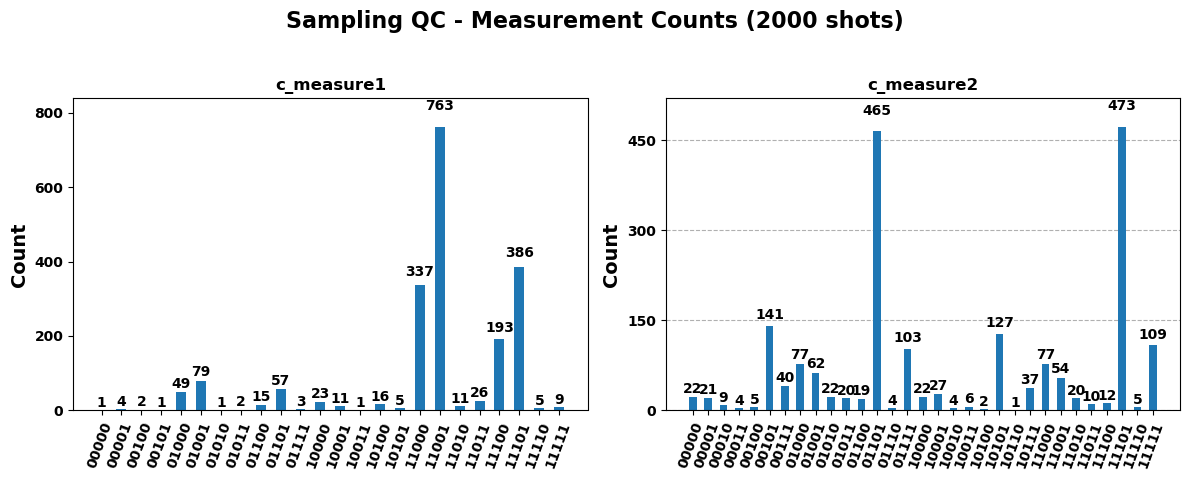

In [70]:
from qsim_cells.generative import plot_measurement_histograms

#counts_measure1, counts_measure2 = plot_measurement_histograms(circuit_xct_cnot, nshots=2000, title_prefix="Sampling QC", figure_save_name='measure_counts_sample_inter_state1.svg', figsize=(13,5))
counts_measure1, counts_measure2 = plot_measurement_histograms(
    circuit_xct_cnot, nshots=2000, backend=backend, title_prefix="Sampling QC"
)

In [33]:
# Reconstruct the matrix
from qsim_cells.generative import create_binary_matrix

reconstructed_matrix = create_binary_matrix(counts_measure1)
print("Reconstructed Binary Matrix 1:")
print(reconstructed_matrix)
print("\nShape of the reconstructed matrix 1:", reconstructed_matrix.shape)

Reconstructed Binary Matrix 1:
[[0 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]
 ...
 [1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 0 1 0]]

Shape of the reconstructed matrix 1: (2000, 5)


In [34]:
# Reconstruct the matrix
reconstructed_matrix2 = create_binary_matrix(counts_measure2)
print("Reconstructed Binary Matrix 1:")
print(reconstructed_matrix2)
print("\nShape of the reconstructed matrix 2:", reconstructed_matrix2.shape)

Reconstructed Binary Matrix 1:
[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [1 1 1 0 0]
 [1 1 1 1 0]
 [1 0 1 0 0]]

Shape of the reconstructed matrix 2: (2000, 5)


In [35]:
import pandas as pd
import anndata as ad
from qsim_cells.generative import create_count_matrix_nbinom

# --- Step 1: Create the first AnnData object (representing one cell type) ---
print("Creating the first AnnData object (adata1)...")
 
# LR pairs
#    g3-g5
#    g7-g0
# Internal regulation of CT2 is g5-g7

# Simulating the first dataset's parameters
num_cells1 = 2000
gene_names1 = ['g0', 'g1', 'g2', 'g3', 'g4']

# Set these genes to be highly expressed in this population
mu_vector1 = np.array([5, 5, 5, 5, 5])
r_vector1 = np.array([1, 1, 1, 1, 1])

# Create dummy data for adata1
np.random.seed(100)
#binary_matrix1 = np.random.randint(0, 2, size=(num_cells1, len(gene_names1)))
count_matrix1 = create_count_matrix_nbinom(reconstructed_matrix, mu_vector1, r_vector1)

cell_ids1 = [f'cell_{i}_ds1_Co' for i in range(num_cells1)]
obs1 = pd.DataFrame(index=cell_ids1)
var1 = pd.DataFrame(index=gene_names1)

# Create the AnnData object for the first dataset
adata1 = ad.AnnData(X=count_matrix1, obs=obs1, var=var1)
print(f"adata1 shape: {adata1.shape}")
print(f"adata1 genes: {adata1.var_names.tolist()}")


Creating the first AnnData object (adata1)...
adata1 shape: (2000, 5)
adata1 genes: ['g0', 'g1', 'g2', 'g3', 'g4']


In [36]:
# --- Step 2: Create the second AnnData object (representing another cell type) ---
print("\nCreating the second AnnData object (adata_mo_mo_mo_mo2)...")

num_cells2 = 2000
gene_names2 = ['g5', 'g6', 'g7', 'g8', 'g9']

# Set these genes to be highly expressed in this population
mu_vector2 = np.array([5, 5, 5, 5, 5])
r_vector2 = np.array([1, 1, 1, 1, 1])

# Create dummy data for adata2
np.random.seed(200)
#binary_matrix2 = np.random.randint(0, 2, size=(num_cells2, len(gene_names2)))
count_matrix2 = create_count_matrix_nbinom(reconstructed_matrix2, mu_vector2, r_vector2)
cell_ids2 = [f'cell_{i}_ds2_Co' for i in range(num_cells2)]
obs2 = pd.DataFrame(index=cell_ids2)
var2 = pd.DataFrame(index=gene_names2)

# Create the AnnData object for the second dataset
adata2 = ad.AnnData(X=count_matrix2, obs=obs2, var=var2)
print(f"adata2 shape: {adata2.shape}")
print(f"adata2 genes: {adata2.var_names.tolist()}")


Creating the second AnnData object (adata_mo_mo_mo_mo2)...
adata2 shape: (2000, 5)
adata2 genes: ['g5', 'g6', 'g7', 'g8', 'g9']


In [37]:
# --- Step 3: Add housekeeping genes ---
print("\nAdding 10 random housekeeping genes to both datasets...")

num_housekeeping_genes = 50
housekeeping_gene_names = [f'HKG_{i}' for i in range(num_housekeeping_genes)]

# Housekeeping genes are highly and consistently expressed across all cells
mu_hkg = np.full(num_housekeeping_genes, 100.0)
r_hkg = np.full(num_housekeeping_genes, 5.0) # High r for low dispersion

# Create a binary matrix with 1s for all housekeeping genes across all cells
binary_matrix_hkg = np.ones((num_cells1 + num_cells2, num_housekeeping_genes), dtype=int)
count_matrix_hkg = create_count_matrix_nbinom(binary_matrix_hkg, mu_hkg, r_hkg)

# Create an AnnData object for the housekeeping genes
hkg_adata = ad.AnnData(
    X=count_matrix_hkg,
    obs=pd.DataFrame(index=list(adata1.obs_names) + list(adata2.obs_names)),
    var=pd.DataFrame(index=housekeeping_gene_names)
)

# --- Step 4: Merge the datasets ---
print("\nMerging all three AnnData objects...")

# First, merge adata1 and adata2 by cells
merged_cell_adata = ad.concat(
    [adata1, adata2],
    axis=0,
    join='outer',
    label='BatchID',
    keys=['ds1_Co', 'ds2_Co']
)

# Fill any NaN values with 0
merged_cell_adata.X[np.isnan(merged_cell_adata.X)] = 0

# Then, merge the combined dataset with the housekeeping genes by features
adata_co = ad.concat(
    [merged_cell_adata, hkg_adata],
    axis=1,
    join='inner',
    merge='unique'
)
adata_co.layers['counts'] = adata_co.X
print("\nFinal Merged AnnData object created:")
print(adata_co)
print(f"Merged shape: {adata_co.shape}")
print(f"Merged genes: {adata_co.var_names.tolist()}")


Adding 10 random housekeeping genes to both datasets...

Merging all three AnnData objects...

Final Merged AnnData object created:
AnnData object with n_obs × n_vars = 4000 × 60
    obs: 'BatchID'
    layers: 'counts'
Merged shape: (4000, 60)
Merged genes: ['g0', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'HKG_0', 'HKG_1', 'HKG_2', 'HKG_3', 'HKG_4', 'HKG_5', 'HKG_6', 'HKG_7', 'HKG_8', 'HKG_9', 'HKG_10', 'HKG_11', 'HKG_12', 'HKG_13', 'HKG_14', 'HKG_15', 'HKG_16', 'HKG_17', 'HKG_18', 'HKG_19', 'HKG_20', 'HKG_21', 'HKG_22', 'HKG_23', 'HKG_24', 'HKG_25', 'HKG_26', 'HKG_27', 'HKG_28', 'HKG_29', 'HKG_30', 'HKG_31', 'HKG_32', 'HKG_33', 'HKG_34', 'HKG_35', 'HKG_36', 'HKG_37', 'HKG_38', 'HKG_39', 'HKG_40', 'HKG_41', 'HKG_42', 'HKG_43', 'HKG_44', 'HKG_45', 'HKG_46', 'HKG_47', 'HKG_48', 'HKG_49']


In [38]:
import scanpy as sc
# --- Step 6: Processing the data with Scanpy ---
print("\nStarting data processing with Scanpy...")

# Load the merged AnnData object
adata = adata_co.copy()
# The 'batch' column is already in obs from the `ad.concat` step.
print("\nDataset batches are now stored in adata.obs['BatchID']:")
print(adata.obs['BatchID'].value_counts())

# --- 6.1 Quality Control (QC) and Metrics ---
sc.pp.calculate_qc_metrics(adata, inplace=True, percent_top=None)

# --- 6.2 Normalization and Log-Transformation ---
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# --- 6.3 Scaling the Data ---
sc.pp.scale(adata, max_value=10)

# --- 6.4 Principal Component Analysis (PCA) ---
# Check if the number of genes is sufficient for PCA
if adata.n_vars > 0:
    sc.tl.pca(adata, svd_solver='arpack')
else:
    print("\nNo genes remaining after filtering. Skipping PCA.")

# --- 6.5 UMAP (Uniform Manifold Approximation and Projection) ---
# Set n_pcs to be the minimum of 20 and the number of genes
n_pcs = min(10, adata.n_vars)
if adata.n_vars > 1:
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=n_pcs)
    sc.tl.umap(adata)
    sc.tl.leiden(adata, flavor="leidenalg", n_iterations=2)

else:
    print("\nNot enough genes to compute neighbors and UMAP. Skipping.")

# --- 6.7 Final Output ---
print("\nFinal AnnData object after UMAP has been computed:")
print(adata)
print("\nUMAP coordinates are stored in adata.obsm['X_umap'].")
print("PCA coordinates are stored in adata.obsm['X_pca'].")
adata_co = adata.copy()


Starting data processing with Scanpy...

Dataset batches are now stored in adata.obs['BatchID']:
BatchID
ds1_Co    2000
ds2_Co    2000
Name: count, dtype: int64

Final AnnData object after UMAP has been computed:
AnnData object with n_obs × n_vars = 4000 × 60
    obs: 'BatchID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

UMAP coordinates are stored in adata.obsm['X_umap'].
PCA coordinates are stored in adata.obsm['X_pca'].


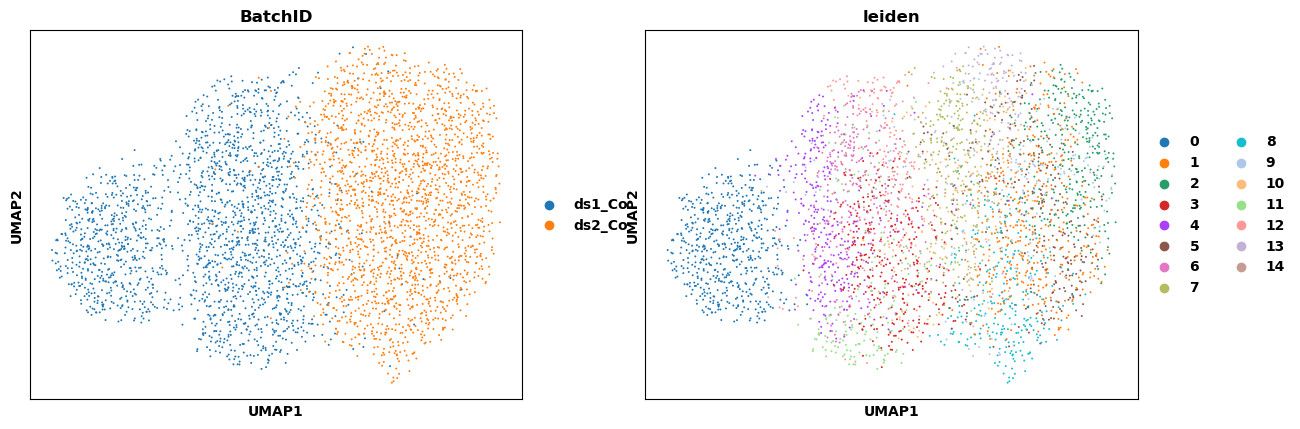

In [39]:
sc.pl.umap(
    adata,
    color=["BatchID", "leiden"],
    # Setting a smaller point size to get prevent overlap
    size=8, #save = 'umap_inter_state1.svg'
)

Number of non-zero elements (connections): 4
Number of non-zero elements (connections): 8


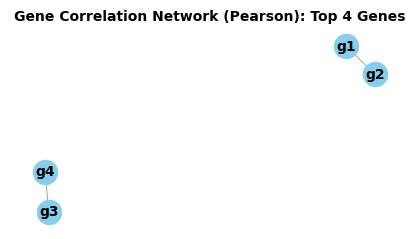

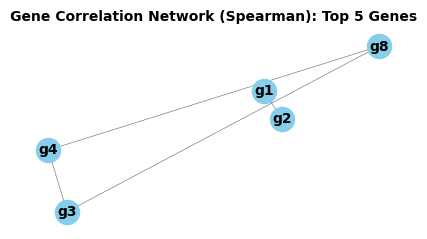

In [40]:
from qsim_cells.grn_utils import prepare_gene_expression_data, calculate_correlation_and_adjacency, plot_correlation_network
gene_expression_df = prepare_gene_expression_data(adata)

# Run calculations for both methods
threshold = 0.5
pearson_genes, pearson_adj_matrix = calculate_correlation_and_adjacency(gene_expression_df, 'pearson', threshold=threshold)
spearman_genes, spearman_adj_matrix = calculate_correlation_and_adjacency(gene_expression_df, 'spearman', threshold=threshold)

# 3. Plot Networks
plot_correlation_network(
pearson_adj_matrix, 
pearson_genes, 
"Pearson", 
num_nodes=10, 
figsize=(4, 2), # Smaller figure size
#filename="pearson_gene_network_inter_state1.svg" # Filename input for saving
)

# Plot 2: Spearman Network (Smaller Figure Size, not saved)
plot_correlation_network(
spearman_adj_matrix, 
spearman_genes, 
"Spearman", 
num_nodes=10, 
figsize=(4, 2), # Smaller figure size
#filename="spearman_gene_network_inter_state1.svg"
)

In [41]:
# Saving mono cultured simulation
# Create the circuit using the function
# ang_4g = [np.pi*0.2, np.pi*0.5, np.pi*0.4, np.pi*0.3, np.pi*0.7]
# circuit_ct1 = create_rotation_circuit(ang_4g)

# # Create the circuit using the function
# ang_ct2 = [np.pi*0.4, np.pi*0.4, np.pi*0.3, np.pi*0.6, np.pi*0.6]
# circuit_ct2 = create_rotation_circuit(ang_ct2)

# Create the circuit using the function
ang_ct1 = [np.pi*0.2, np.pi*0.1, np.pi*0.4, np.pi*0.9, np.pi*0.8]
circuit_ct1 = create_rotation_circuit(ang_ct1)
# Fn1 the last

# Create the circuit using the function
ang_ct2 = [np.pi*0.2, np.pi*0.3, np.pi*0.2, np.pi*0.7, np.pi*0.5]
circuit_ct2 = create_rotation_circuit(ang_ct2)
# the last 2 are Cd44 and Sdc4

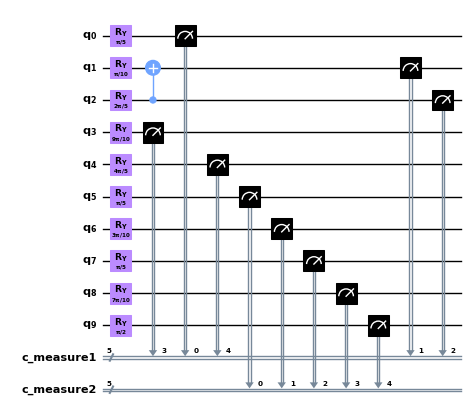

In [42]:
circuit_xct = concatenate_circuits_with_separate_measurements(circuit_ct1, circuit_ct2)
#interaction_map = list([(0,1), (2,1), (2,3), 
#                        (6,5), (5, 7)])
interaction_map = list([(2,1)])

#interaction_map = list([(1, 0)])

circuit_xct_cnot = add_cnots_and_measurements_to_circuit(circuit_xct, circuit_ct1.num_qubits, interaction_map )
circuit_xct_cnot.draw(output="mpl", style="clifford", fold=40,  scale = 0.5)
#circuit_xct_cnot.draw(output="mpl", style="clifford", fold=40,  scale = 0.5, filename='circuit_inter_state0.svg')


--- Running circuit for: Sampling QC ---
Counts for c_measure1: {'11000': 1050, '11110': 518, '11111': 67, '01000': 89, '10110': 21, '11001': 107, '01001': 8, '01111': 6, '00000': 2, '11010': 19, '01110': 65, '10010': 2, '10111': 2, '11100': 12, '10000': 24, '10001': 3, '01010': 1, '11101': 2, '01100': 1, '11011': 1}
Counts for c_measure2: {'10100': 19, '00010': 27, '11000': 534, '10000': 131, '01000': 521, '11001': 45, '01010': 142, '11010': 139, '00101': 4, '10010': 31, '10001': 15, '01001': 55, '01100': 70, '11100': 48, '00000': 125, '01110': 8, '00011': 7, '01011': 9, '01101': 6, '00001': 14, '00100': 11, '11101': 5, '11110': 8, '10110': 6, '10011': 4, '11011': 9, '00110': 3, '10101': 2, '11111': 2}


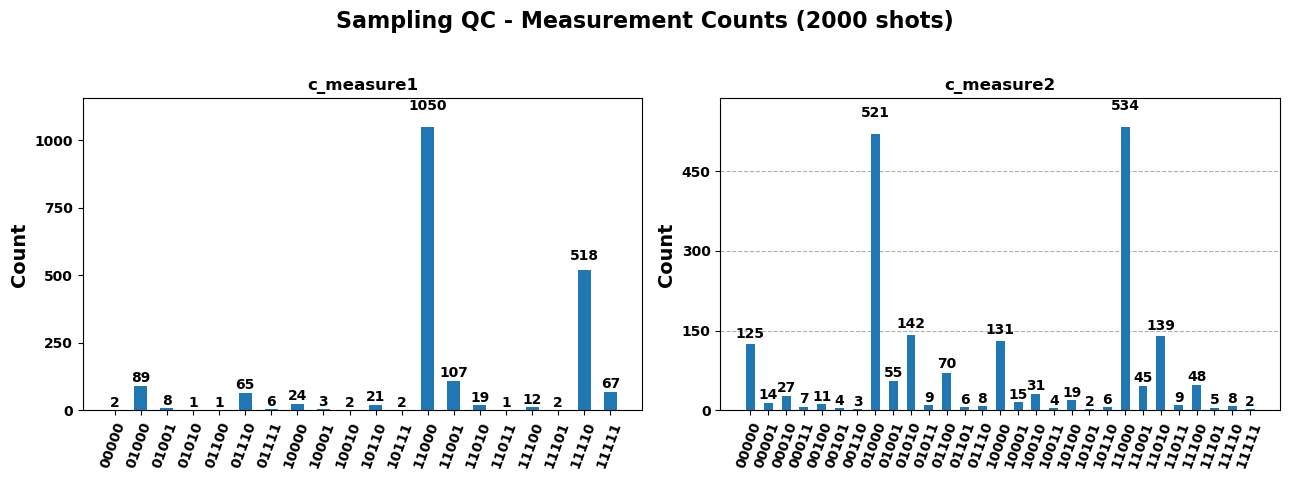

In [43]:
#counts_measure1, counts_measure2 = plot_measurement_histograms(circuit_xct_cnot, nshots=2000, title_prefix="Sampling QC", figure_save_name='measure_counts_sample_inter_state0.svg', figsize=(13,5))
counts_measure1, counts_measure2 = plot_measurement_histograms(circuit_xct_cnot, backend=backend, nshots=2000, title_prefix="Sampling QC", figsize=(13,5))

In [44]:
# Reconstruct the matrix
reconstructed_matrix = create_binary_matrix(counts_measure1)
print("Reconstructed Binary Matrix 1:")
print(reconstructed_matrix)
print("\nShape of the reconstructed matrix 1:", reconstructed_matrix.shape)
# Reconstruct the matrix
reconstructed_matrix2 = create_binary_matrix(counts_measure2)
print("Reconstructed Binary Matrix 1:")
print(reconstructed_matrix2)
print("\nShape of the reconstructed matrix 1:", reconstructed_matrix2.shape)

Reconstructed Binary Matrix 1:
[[0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 ...
 [1 0 1 1 1]
 [0 0 1 1 0]
 [1 1 0 1 1]]

Shape of the reconstructed matrix 1: (2000, 5)
Reconstructed Binary Matrix 1:
[[0 0 1 0 1]
 [0 0 1 0 1]
 [0 0 1 0 1]
 ...
 [1 0 1 0 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Shape of the reconstructed matrix 1: (2000, 5)


In [45]:
# Genes generated with stringdb:    https://string-db.org/cgi/network?taskId=bJEFw413SU2h&sessionId=bcTc0aENh3tL
# --- Step 1: Create the first AnnData object (representing one cell type) ---
print("Creating the first AnnData object (adata1)...")

# Simulating the first dataset's parameters
num_cells1 = 2000
gene_names1 = ['g0', 'g1', 'g2', 'g3', 'g4']

# Set these genes to be highly expressed in this population
mu_vector1 = np.array([5, 5, 5, 5, 5])
r_vector1 = np.array([1, 1, 1, 1, 1])

# Create dummy data for adata1
np.random.seed(100)
#binary_matrix1 = np.random.randint(0, 2, size=(num_cells1, len(gene_names1)))
count_matrix1 = create_count_matrix_nbinom(reconstructed_matrix, mu_vector1, r_vector1)

cell_ids1 = [f'cell_{i}_ds1_Mo' for i in range(num_cells1)]
obs1 = pd.DataFrame(index=cell_ids1)
var1 = pd.DataFrame(index=gene_names1)

# Create the AnnData object for the first dataset
adata1 = ad.AnnData(X=count_matrix1, obs=obs1, var=var1)
print(f"adata1 shape: {adata1.shape}")
print(f"adata1 genes: {adata1.var_names.tolist()}")

Creating the first AnnData object (adata1)...
adata1 shape: (2000, 5)
adata1 genes: ['g0', 'g1', 'g2', 'g3', 'g4']


In [46]:
# --- Step 2: Create the second AnnData object (representing another cell type) ---
print("\nCreating the second AnnData object (adata2)...")

num_cells2 = 2000
gene_names2 = ['g5', 'g6', 'g7', 'g8', 'g9']

# Set these genes to be highly expressed in this population
mu_vector2 = np.array([5, 5, 5, 5, 5])
r_vector2 = np.array([1, 1, 1, 1, 1])

# Create dummy data for adata2
np.random.seed(200)
#binary_matrix2 = np.random.randint(0, 2, size=(num_cells2, len(gene_names2)))
count_matrix2 = create_count_matrix_nbinom(reconstructed_matrix2, mu_vector2, r_vector2)
cell_ids2 = [f'cell_{i}_ds2_Mo' for i in range(num_cells2)]
obs2 = pd.DataFrame(index=cell_ids2)
var2 = pd.DataFrame(index=gene_names2)

# Create the AnnData object for the second dataset
adata2 = ad.AnnData(X=count_matrix2, obs=obs2, var=var2)
print(f"adata2 shape: {adata2.shape}")
print(f"adata2 genes: {adata2.var_names.tolist()}")



Creating the second AnnData object (adata2)...
adata2 shape: (2000, 5)
adata2 genes: ['g5', 'g6', 'g7', 'g8', 'g9']


In [47]:
# --- Step 3: Add housekeeping genes ---
print("\nAdding 10 random housekeeping genes to both datasets...")

num_housekeeping_genes = 50
housekeeping_gene_names = [f'HKG_{i}' for i in range(num_housekeeping_genes)]

# Housekeeping genes are highly and consistently expressed across all cells
mu_hkg = np.full(num_housekeeping_genes, 80.0)
r_hkg = np.full(num_housekeeping_genes, 6.0) # High r for low dispersion

# Create a binary matrix with 1s for all housekeeping genes across all cells
binary_matrix_hkg = np.ones((num_cells1 + num_cells2, num_housekeeping_genes), dtype=int)
count_matrix_hkg = create_count_matrix_nbinom(binary_matrix_hkg, mu_hkg, r_hkg)

# Create an AnnData object for the housekeeping genes
hkg_adata = ad.AnnData(
    X=count_matrix_hkg,
    obs=pd.DataFrame(index=list(adata1.obs_names) + list(adata2.obs_names)),
    var=pd.DataFrame(index=housekeeping_gene_names)
)

# --- Step 4: Merge the datasets ---
print("\nMerging all three AnnData objects...")

# First, merge adata1 and adata2 by cells
merged_cell_adata = ad.concat(
    [adata1, adata2],
    axis=0,
    join='outer',
    label='BatchID',
    keys=['ds1_Mo', 'ds2_Mo']
)

# Fill any NaN values with 0
merged_cell_adata.X[np.isnan(merged_cell_adata.X)] = 0

# Then, merge the combined dataset with the housekeeping genes by features
adata_mo = ad.concat(
    [merged_cell_adata, hkg_adata],
    axis=1,
    join='inner',
    merge='unique'
)
adata_mo.layers['counts'] = adata_mo.X

print("\nFinal Merged AnnData object created:")
print(adata_mo)
print(f"Merged shape: {adata_mo.shape}")
print(f"Merged genes: {adata_mo.var_names.tolist()}")



Adding 10 random housekeeping genes to both datasets...

Merging all three AnnData objects...

Final Merged AnnData object created:
AnnData object with n_obs × n_vars = 4000 × 60
    obs: 'BatchID'
    layers: 'counts'
Merged shape: (4000, 60)
Merged genes: ['g0', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'HKG_0', 'HKG_1', 'HKG_2', 'HKG_3', 'HKG_4', 'HKG_5', 'HKG_6', 'HKG_7', 'HKG_8', 'HKG_9', 'HKG_10', 'HKG_11', 'HKG_12', 'HKG_13', 'HKG_14', 'HKG_15', 'HKG_16', 'HKG_17', 'HKG_18', 'HKG_19', 'HKG_20', 'HKG_21', 'HKG_22', 'HKG_23', 'HKG_24', 'HKG_25', 'HKG_26', 'HKG_27', 'HKG_28', 'HKG_29', 'HKG_30', 'HKG_31', 'HKG_32', 'HKG_33', 'HKG_34', 'HKG_35', 'HKG_36', 'HKG_37', 'HKG_38', 'HKG_39', 'HKG_40', 'HKG_41', 'HKG_42', 'HKG_43', 'HKG_44', 'HKG_45', 'HKG_46', 'HKG_47', 'HKG_48', 'HKG_49']


In [48]:
# --- Step 6: Processing the data with Scanpy ---
print("\nStarting data processing with Scanpy...")

# Load the merged AnnData object
adata = adata_mo.copy()

# The 'batch' column is already in obs from the `ad.concat` step.
print("\nDataset batches are now stored in adata.obs['batch']:")
print(adata.obs['BatchID'].value_counts())

# --- 6.1 Quality Control (QC) and Metrics ---
sc.pp.calculate_qc_metrics(adata, inplace=True, percent_top=None)

# --- 6.2 Normalization and Log-Transformation ---
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# --- 6.3 Scaling the Data ---
sc.pp.scale(adata, max_value=10)

# --- 6.4 Principal Component Analysis (PCA) ---
# Check if the number of genes is sufficient for PCA
if adata.n_vars > 0:
    sc.tl.pca(adata, svd_solver='arpack')
else:
    print("\nNo genes remaining after filtering. Skipping PCA.")

# --- 6.5 UMAP (Uniform Manifold Approximation and Projection) ---
# Set n_pcs to be the minimum of 20 and the number of genes
n_pcs = min(10, adata.n_vars)
if adata.n_vars > 1:
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=n_pcs)
    sc.tl.umap(adata)
    sc.tl.leiden(adata, flavor="leidenalg", n_iterations=2)

else:
    print("\nNot enough genes to compute neighbors and UMAP. Skipping.")

# --- 6.7 Final Output ---
print("\nFinal AnnData object after UMAP has been computed:")
print(adata)
print("\nUMAP coordinates are stored in adata.obsm['X_umap'].")
print("PCA coordinates are stored in adata.obsm['X_pca'].")
adata_mo = adata.copy()


Starting data processing with Scanpy...

Dataset batches are now stored in adata.obs['batch']:
BatchID
ds1_Mo    2000
ds2_Mo    2000
Name: count, dtype: int64

Final AnnData object after UMAP has been computed:
AnnData object with n_obs × n_vars = 4000 × 60
    obs: 'BatchID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

UMAP coordinates are stored in adata.obsm['X_umap'].
PCA coordinates are stored in adata.obsm['X_pca'].


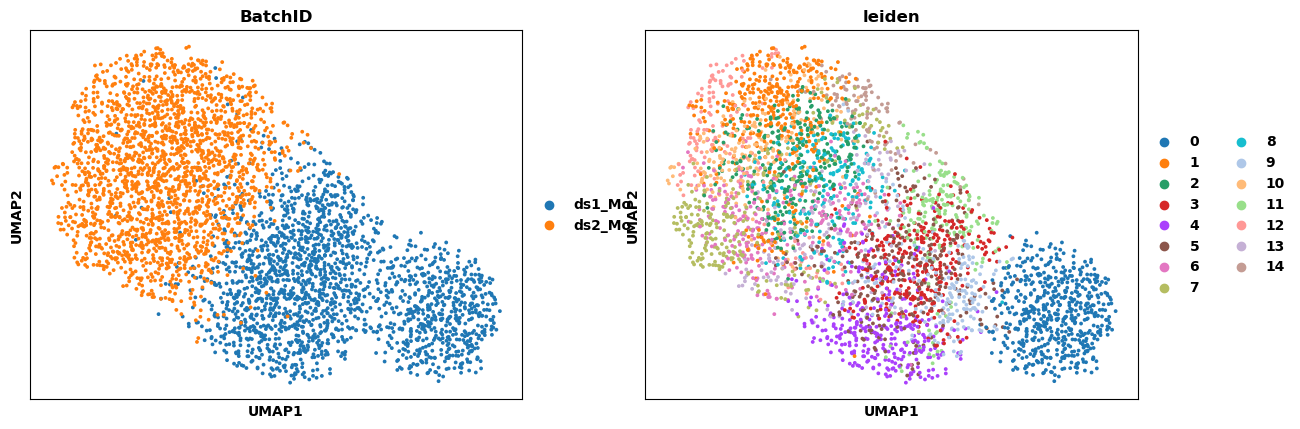

In [49]:
sc.pl.umap(
    adata,
    color=["BatchID", "leiden"],
    #size=8, save = 'umap_inter_state0.svg'
)

Number of non-zero elements (connections): 6
Number of non-zero elements (connections): 8


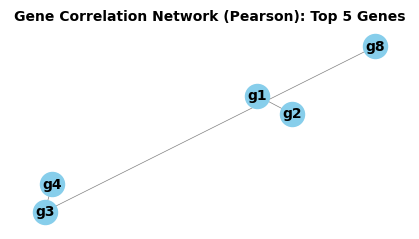

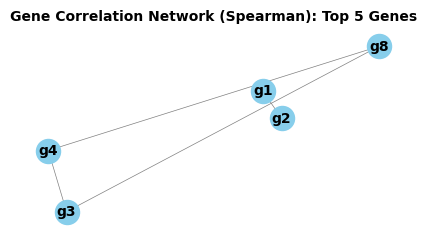

In [50]:
gene_expression_df = prepare_gene_expression_data(adata)

# Run calculations for both methods
threshold = 0.5
pearson_genes, pearson_adj_matrix = calculate_correlation_and_adjacency(gene_expression_df, 'pearson', threshold=threshold)
spearman_genes, spearman_adj_matrix = calculate_correlation_and_adjacency(gene_expression_df, 'spearman', threshold=threshold)

# 3. Plot Networks
plot_correlation_network(
    pearson_adj_matrix, 
    pearson_genes, 
    "Pearson", 
    num_nodes=10, 
    figsize=(4, 2), # Smaller figure size
    #filename="pearson_gene_network_inter_state0.svg" # Filename input for saving
)

# Plot 2: Spearman Network (Smaller Figure Size, not saved)
plot_correlation_network(
    spearman_adj_matrix, 
    spearman_genes, 
    "Spearman", 
    num_nodes=10, 
    figsize=(4, 2), # Smaller figure size
    #filename="spearman_gene_network_inter_state0.svg"
)

cell_0_ds1_Mo    CellType1
cell_1_ds1_Mo    CellType1
cell_2_ds1_Mo    CellType1
cell_3_ds1_Mo    CellType1
cell_4_ds1_Mo    CellType1
Name: CellType, dtype: category
Categories (2, object): ['CellType1', 'CellType2']


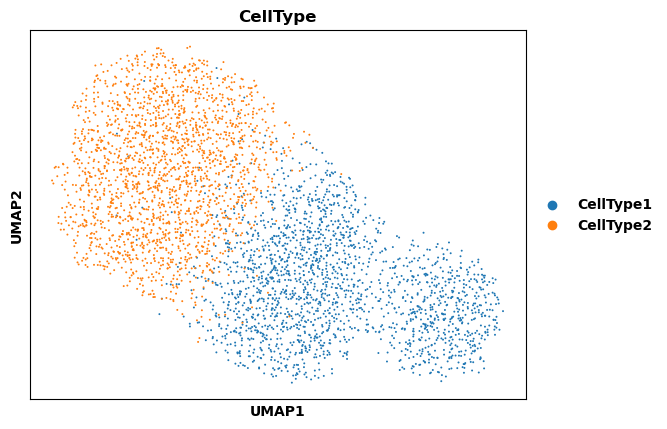

In [51]:
import numpy as np
import pandas as pd
import scanpy as sc 

#adata_mo = adata2 #sc.read_h5ad("merged_datasets_mo.h5ad")

adata_mo.obs['CellType'] = None
adata_mo.obs['Batch2'] = 'Mo'

# Assign 'CAF' where the 'batch' is 'ds1'.
adata_mo.obs.loc[adata_mo.obs['BatchID'] == 'ds1_Mo', 'CellType'] = 'CellType1'

# Assign 'Fibroblasts' where the 'batch' is 'ds2'.
adata_mo.obs.loc[adata_mo.obs['BatchID'] == 'ds2_Mo', 'CellType'] = 'CellType2'
adata_mo.obs['CellType'] = adata_mo.obs['CellType'].astype('category')

print(adata_mo.obs['CellType'].head())

sc.pl.umap(
    adata_mo,
    color=["CellType"],
    # Setting a smaller point size to get prevent overlap
    size=8, #save = 'umap_inter_state0.svg'
)

cell_0_ds1_Co    CellType1
cell_1_ds1_Co    CellType1
cell_2_ds1_Co    CellType1
cell_3_ds1_Co    CellType1
cell_4_ds1_Co    CellType1
Name: CellType, dtype: category
Categories (2, object): ['CellType1', 'CellType2']


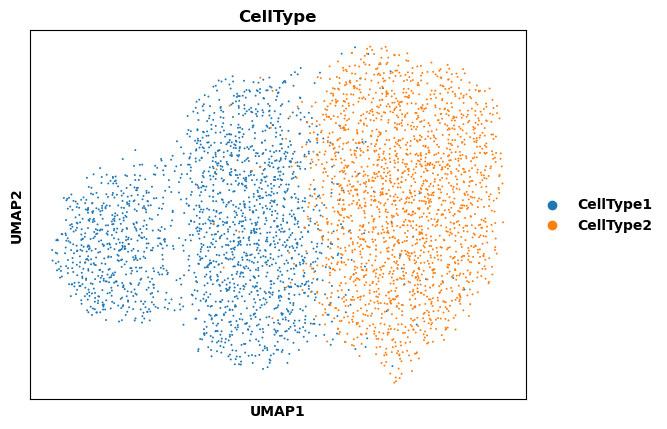

In [52]:
import numpy as np
import pandas as pd
import scanpy as sc 

adata_co.obs['CellType'] = None
adata_co.obs['Batch2'] = 'Co'

# Assign 'CAF' where the 'batch' is 'ds1'.
adata_co.obs.loc[adata_co.obs['BatchID'] == 'ds1_Co', 'CellType'] = 'CellType1'

# Assign 'Fibroblasts' where the 'batch' is 'ds2'.
adata_co.obs.loc[adata_co.obs['BatchID'] == 'ds2_Co', 'CellType'] = 'CellType2'
adata_co.obs['CellType'] = adata_co.obs['CellType'].astype('category')

print(adata_co.obs['CellType'].head())
sc.pl.umap(
    adata_co,
    color=["CellType"],
    # Setting a smaller point size to get prevent overlap
    size=8, #save = 'umap_inter_state1.svg'
)

In [53]:
import anndata as ad

# Assuming adata_mo and adata_co are already loaded
adatas = [adata_mo, adata_co]

adata_merged = ad.concat(
    adatas,
    join='inner',  # Keeps only the variables (genes) that are common to both datasets
    label='condition', # Creates a new column named 'condition' in adata_merged.obs
    keys=['monoculture', 'coculture'] # Populates the 'condition' column with 'monoculture' and 'coculture'
)

In [54]:
adata_merged.X = adata_merged.layers['counts']

In [55]:
import scipy.sparse as sp
adata_merged.X = sp.csr_matrix(adata_merged.X)
adata_merged.write_h5ad('sim_merged_datasets_co_mo_quantum_simulated.h5ad')
#adata_merged.write_h5ad('sim_merged_datasets_co_mo_quantum_device.h5ad')